In [1]:
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from scipy.fftpack import fft, fftshift
from scipy.signal import argrelmax
from scipy.special import iv

# Ventana Kaiser
$$w_{rz}[n]=1,\quad \left|n\right| \le \frac{M-1}{2}$$

$$w_{kz}[n]= w_{rz}[n] \left[ \frac{I_0\left(\beta\sqrt{1-\left(\frac{n}{M/2}\right)^2}\right)}
{I_0(\beta)} \right]$$

* $I_0(x)$, función de Bessel modificada de primera clase de orden cero
* Centrada en el origen (zero-phase)
* Longitud M (impar)

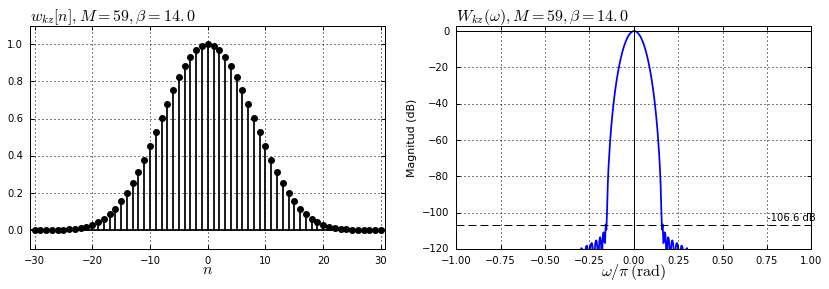

In [2]:
def kaiserplot(M=7, beta=0):
    N = 30
    pad = int((2*N+1-M)/2)
    n = np.r_[-N:N+1:1]
    alpha = [0.42, 0.5, 0.08]
    Mo2 = int((M-1)/2)
    wk = iv(0, beta*np.sqrt(1-(np.r_[-Mo2:Mo2+1:1]/(M/2))**2))/iv(0, beta)
    x = np.r_[[0]*pad, wk, [0]*pad]
    Nfft = 512
    Wk = fftshift(fft(x, Nfft))
    Wk /= np.max(Wk)
    aWk = np.abs(Wk)
    mWk = 20*np.log10(aWk)
    o = np.linspace(-1, 1, Nfft)
    plt.subplots(1, 2, figsize=(14, 4))
    plt.subplot(121)
    offx = 0.75
    lines = plt.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')
    lines[2].set_xdata([n[0]-1, n[-1]+1])
    plt.axis([-N-offx, N+offx, -0.1, 1.1])
    plt.grid(True)
    plt.xlabel(r'$n$', fontsize=16, labelpad=-4)
    plt.title(r'$w_{kz}[n], M=' + '{0}$'.format(M) + r'$,\beta={0}'.format(beta) + r'$', fontsize=16, loc='left')
    plt.subplot(122)
    plt.plot(o, mWk)
    plt.axis([-1, 1, -120, 3])
    plt.xticks(np.r_[-1:1.25:0.25])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)

    maxidx = argrelmax(np.abs(aWk), mode='wrap')
    maxWk = aWk[maxidx]
    maxWk[np.argmax(maxWk)] = 0
    at1 = 20*np.log10(np.max(maxWk))
    plt.axhline(at1, color='k', linewidth=1, dashes=(8,4))
    plt.text(0.75, at1 + 2, '{0:.1f} dB'.format(at1))

    plt.grid(True)
    plt.title(r'$W_{kz}(\omega), M=' + '{0}$'.format(M) + r'$,\beta={0}'.format(beta) + 
              r'$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Magnitud (dB)')
interact(kaiserplot, M=(11, 59, 2), beta=(0, 14, 0.5))